##  Net Russian prosecutors' education 
#### Used Prosecutors_all.csv 

In [1]:
import csv
import networkx as nx
import collections

#G = nx.Graph()
G = nx.DiGraph() 

In [2]:
#add list persones

# used data > Prosecutors_all.csv 
#Prosecutors_all.csv has id for every prosecutors row and rows with " "

with open('Prosecutors_all.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['name_eng'] != "":
            #print(row['id'],row['name_eng'])
            
            #Prosecutors_all consist all values below 
            #I want add persone like node and add values to node to use it next
            
            G.add_node(row['id'],
                       type = 'prosecutor',
                       name_eng = row['name_eng'],
                       office_eng= row['office_eng'],
                       date_of_appointment = row['date_of_appointment'],
                       gender = row['gender'],
                       age = row['age'],
                       birth_place_region_eng = row['birth_place_region_eng'],
                       birth_place_location_eng = row['birth_place_location_eng'],
                       
                       # university
                       university_eng = row['university_eng'],
                       grad_year = row['grad_year'],
                       ed_level_eng = row['ed_level_eng'],
                       # ========
                       
                       staff_income = row['staff_income'],
                       spouse_income  = row['spouse_income'],
                       image = row['image'])

In [3]:
# Add else nodes education to use these university with prosecutors
# make nodes universities 

#prepare listEducation
listUniversity = list()

with open('Prosecutors_all.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['name_eng'] != "":
            listUniversity.append(row['university_eng'])
            #print(row['id'],row['name_eng'])
            
listUniversity = list(set(listUniversity))
listUniversity.remove('')

In [4]:
# add special id > 1000 to universities Items
id = 1000
dictUniversity = dict()

for ed in listUniversity:
    #prepare dict for function below 'find_id_node()'
    dictUniversity[id] = ed
    #add nodes
    G.add_node(id,type = "education",name_uni = ed)
    
    id+=1

In [5]:
def find_id_node(dictOfWords,SearchStr):
    listOfKeys = [key  for (key, value) in dictOfWords.items() if value == SearchStr]
    return listOfKeys[0]

In [6]:
#dictUniversity

In [7]:
# make edges between prosecut & universities

for node in G.nodes.data():
    if node[1]['type'] ==  'prosecutor':
        try:
            G.add_edge(node[0],find_id_node(dictUniversity,node[1]['university_eng']))
            #print(node[0],find_id_node(dictUniversity,node[1]['university_eng']))
        except:
            #some Prosecutors don't have education items 
            print(node[1])

{'type': 'prosecutor', 'name_eng': 'Avagumyan G.K.', 'office_eng': "General Prosecutor's Office of the Urals Federal District", 'date_of_appointment': '', 'gender': 'male', 'age': '', 'birth_place_region_eng': '', 'birth_place_location_eng': '', 'university_eng': '', 'grad_year': '', 'ed_level_eng': 'specialist', 'staff_income': '1\xa0935\xa0131,00', 'spouse_income': '1\xa0721,00', 'image': ''}
{'type': 'prosecutor', 'name_eng': 'Bukreev Konstantin Nikolaevich', 'office_eng': "Moscow interregion transport prosecutor's office", 'date_of_appointment': '2019', 'gender': 'male', 'age': '42', 'birth_place_region_eng': 'Khabarovsk region', 'birth_place_location_eng': 'Khabarovsk', 'university_eng': '', 'grad_year': '1999', 'ed_level_eng': 'specialist', 'staff_income': '3\xa0412\xa0552,22', 'spouse_income': '', 'image': 'http://www.mmtproc.ru/content/Image/Bukreev_info.jpg'}
{'type': 'prosecutor', 'name_eng': 'Lapshov V.V.', 'office_eng': "General Prosecutor's Office of the Urals Federal Dist

In [8]:
#Analise for predecessors 
for node in G.nodes.data():
    G.nodes[node[0]]['predecessors'] = len(list(G.predecessors(node[0])))

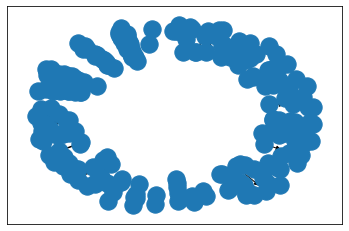

In [9]:
#check net
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=False)

In [10]:
#convert net for Gephi
nx.write_gexf(G, "01_Russian_prosecutors_education.gexf")